In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import Counter

In [163]:
data = pd.read_csv('Salary_Data.csv')

In [164]:
data.shape

(6704, 6)

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [166]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['Gender', 'Education Level', 'Job Title']

for col in cols_cat:
  print(f'Columna {col}: {data[col].unique()} subniveles\n')

Columna Gender: ['Male' 'Female' nan 'Other'] subniveles

Columna Education Level: ["Bachelor's" "Master's" 'PhD' nan "Bachelor's Degree" "Master's Degree"
 'High School' 'phD'] subniveles

Columna Job Title: ['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative 

In [167]:
for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles\n')

Columna Gender: 3 subniveles

Columna Education Level: 7 subniveles

Columna Job Title: 193 subniveles



# Etapa 1 - Datos faltantes

In [168]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [169]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


# Etapa 2 - Columnas irrelevantes

### Renombramiento de columnas

In [170]:
#data.rename(columns={'Education Level': 'Education_Level',
#                      'Job Title': 'Job_Title',
#                      'Years of Experience': 'Years_of_Experience'}, inplace= True)
#data.columns

### Transformación de valores a minúscula

In [171]:
columnas_categoricas = ['Gender', 'Education Level', "Job Title"]

#Se transforman en minúscula
for column in data.columns:
    # Representar en minúsculas sólo si la columna es categórica
    if column in columnas_categoricas:
        data[column] = data[column].str.lower()

data.head()



,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,male,bachelor's,software engineer,5.0,90000.0
1,28.0,female,master's,data analyst,3.0,65000.0
2,45.0,male,phd,senior manager,15.0,150000.0
3,36.0,female,bachelor's,sales associate,7.0,60000.0
4,52.0,male,master's,director,20.0,200000.0


In [172]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['Gender', 'Education Level', 'Job Title']

In [173]:
for col in cols_cat:
  print(f'Columna {col}: {data[col].unique()} subniveles\n')


Columna Gender: ['male' 'female' 'other'] subniveles

Columna Education Level: ["bachelor's" "master's" 'phd' "bachelor's degree" "master's degree"
 'high school'] subniveles

Columna Job Title: ['software engineer' 'data analyst' 'senior manager' 'sales associate'
 'director' 'marketing analyst' 'product manager' 'sales manager'
 'marketing coordinator' 'senior scientist' 'software developer'
 'hr manager' 'financial analyst' 'project manager' 'customer service rep'
 'operations manager' 'marketing manager' 'senior engineer'
 'data entry clerk' 'sales director' 'business analyst' 'vp of operations'
 'it support' 'recruiter' 'financial manager' 'social media specialist'
 'software manager' 'junior developer' 'senior consultant'
 'product designer' 'ceo' 'accountant' 'data scientist'
 'marketing specialist' 'technical writer' 'hr generalist'
 'project engineer' 'customer success rep' 'sales executive' 'ux designer'
 'operations director' 'network engineer' 'administrative assistant'
 's

In [174]:
for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles\n')

Columna Gender: 3 subniveles

Columna Education Level: 6 subniveles

Columna Job Title: 190 subniveles



### Columnas numéricas

In [175]:
data.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


### Valores de la columna Education_Level reducido/unidos

In [176]:
data['Education Level'].unique()

array(["bachelor's", "master's", 'phd', "bachelor's degree",
       "master's degree", 'high school'], dtype=object)

In [177]:
# Define a dictionary to map current values to new standardized values
education_map = {
    "bachelor's degree": "bachelor's",
    "master's degree": "master's",
}

# Use the map to replace the values
data['Education Level'] = data['Education Level'].replace(education_map)

data['Education Level'].unique()

array(["bachelor's", "master's", 'phd', 'high school'], dtype=object)

### Reducción de valores en la columna de Job_Title

In [178]:
data['Job Title'].value_counts()

Job Title
software engineer             518
data scientist                453
software engineer manager     376
data analyst                  363
senior project engineer       318
                             ... 
copywriter                      1
account manager                 1
help desk analyst               1
senior training specialist      1
software project manager        1
Name: count, Length: 190, dtype: int64

In [179]:
# Define a list of classifications
classifications = ['Engineer', 'Analyst', 'Associate', 'Director', 
                   'Coordinator', 'Scientist', 'Developer', 'Representative',
                   'Clerk', 'Rep', 'Support', 'Specialist', 'Consultant', 
                   'Designer', 'Writer', 'Generalist', 'Researcher', 
                   'Accountant', 'Recruiter', 'Officer', 'Advisor', 
                   'Producer', 'Copywriter']  # 'Manager' removed

# Create a new column 'Job Classification' initialized with 'Other'
data['Job Classification'] = 'Other'

# Loop through classifications and assign them to 'Job Classification' where appropriate
for classification in classifications:
    data.loc[data['Job Title'].str.contains(classification, case=False, na=False), 'Job Classification'] = classification

# Titles like 'CEO', 'VP', 'Executive', and 'Man' to be classified as 'Executive'
executives = ['CEO', 'VP', 'Executive', 'Man']
for executive in executives:
    data.loc[data['Job Title'].str.contains(executive, case=False, na=False), 'Job Classification'] = 'Executive' 

# Classify 'Manager'
data.loc[data['Job Title'].str.contains('Manager', case=False, na=False), 'Job Classification'] = 'Manager'

# Verify the changes
print(data['Job Classification'].value_counts())

Job Classification
Manager        1757
Engineer       1448
Developer       832
Scientist       638
Analyst         622
Director        437
Associate       219
Coordinator     212
Designer        110
Generalist      107
Executive        99
Rep              89
Other            65
Specialist       34
Accountant        6
Advisor           5
Recruiter         4
Consultant        4
Copywriter        2
Researcher        2
Officer           2
Writer            1
Support           1
Clerk             1
Producer          1
Name: count, dtype: int64


In [180]:
#data.drop('Job_Title', axis = 1, inplace = True)
#data.rename(columns={'Job_Classification': 'Job_Title'}, inplace = True)

In [181]:
data['Job Title'].value_counts()

Job Title
software engineer             518
data scientist                453
software engineer manager     376
data analyst                  363
senior project engineer       318
                             ... 
copywriter                      1
account manager                 1
help desk analyst               1
senior training specialist      1
software project manager        1
Name: count, Length: 190, dtype: int64

In [182]:
for col in cols_cat:
  print(f'Columna {col}: {data[col].unique()} subniveles\n')

Columna Gender: ['male' 'female' 'other'] subniveles

Columna Education Level: ["bachelor's" "master's" 'phd' 'high school'] subniveles

Columna Job Title: ['software engineer' 'data analyst' 'senior manager' 'sales associate'
 'director' 'marketing analyst' 'product manager' 'sales manager'
 'marketing coordinator' 'senior scientist' 'software developer'
 'hr manager' 'financial analyst' 'project manager' 'customer service rep'
 'operations manager' 'marketing manager' 'senior engineer'
 'data entry clerk' 'sales director' 'business analyst' 'vp of operations'
 'it support' 'recruiter' 'financial manager' 'social media specialist'
 'software manager' 'junior developer' 'senior consultant'
 'product designer' 'ceo' 'accountant' 'data scientist'
 'marketing specialist' 'technical writer' 'hr generalist'
 'project engineer' 'customer success rep' 'sales executive' 'ux designer'
 'operations director' 'network engineer' 'administrative assistant'
 'strategy consultant' 'copywriter' 'accou

In [183]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Job Classification
0,32.0,male,bachelor's,software engineer,5.0,90000.0,Engineer
1,28.0,female,master's,data analyst,3.0,65000.0,Analyst
2,45.0,male,phd,senior manager,15.0,150000.0,Manager
3,36.0,female,bachelor's,sales associate,7.0,60000.0,Associate
4,52.0,male,master's,director,20.0,200000.0,Director
...,...,...,...,...,...,...,...
6699,49.0,female,phd,director of marketing,20.0,200000.0,Director
6700,32.0,male,high school,sales associate,3.0,50000.0,Associate
6701,30.0,female,bachelor's,financial manager,4.0,55000.0,Manager
6702,46.0,male,master's,marketing manager,14.0,140000.0,Manager


In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
 6   Job Classification   6698 non-null   object 
dtypes: float64(3), object(4)
memory usage: 418.6+ KB


In [185]:
data['Years of Experience'] = data['Years of Experience'].astype(int)
data['Age'] = data['Age'].astype(int)

In [186]:
data['Gender'].value_counts()

Gender
male      3671
female    3013
other       14
Name: count, dtype: int64

In [187]:
df_hombres = data[data['Gender'] == 'male']
df_hombres

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Job Classification
0,32,male,bachelor's,software engineer,5,90000.0,Engineer
2,45,male,phd,senior manager,15,150000.0,Manager
4,52,male,master's,director,20,200000.0,Director
5,29,male,bachelor's,marketing analyst,2,55000.0,Analyst
7,31,male,bachelor's,sales manager,4,80000.0,Manager
...,...,...,...,...,...,...,...
6694,27,male,high school,digital marketing manager,2,40000.0,Manager
6696,28,male,phd,sales representative,4,55000.0,Rep
6698,37,male,bachelor's,junior sales representative,6,75000.0,Rep
6700,32,male,high school,sales associate,3,50000.0,Associate


In [188]:
df_mujeres = data[data['Gender'] == 'female']
df_mujeres

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Job Classification
1,28,female,master's,data analyst,3,65000.0,Analyst
3,36,female,bachelor's,sales associate,7,60000.0,Associate
6,42,female,master's,product manager,12,120000.0,Manager
8,26,female,bachelor's,marketing coordinator,1,45000.0,Coordinator
11,48,female,bachelor's,hr manager,18,140000.0,Manager
...,...,...,...,...,...,...,...
6695,33,female,bachelor's,content marketing manager,7,90000.0,Manager
6697,51,female,master's,senior product marketing manager,19,190000.0,Manager
6699,49,female,phd,director of marketing,20,200000.0,Director
6701,30,female,bachelor's,financial manager,4,55000.0,Manager


In [260]:
anos_experiencia_mujeres = df_mujeres['Job Classification'].str.split(', ').explode()
contar_trabajos_mujeres = Counter(anos_experiencia_mujeres)
top_trabajos_mujeres = contar_trabajos_mujeres.most_common(10)
df_top_trabajos_mujeres = pd.DataFrame(top_trabajos_mujeres, columns = ["Job Classification", "Count"])

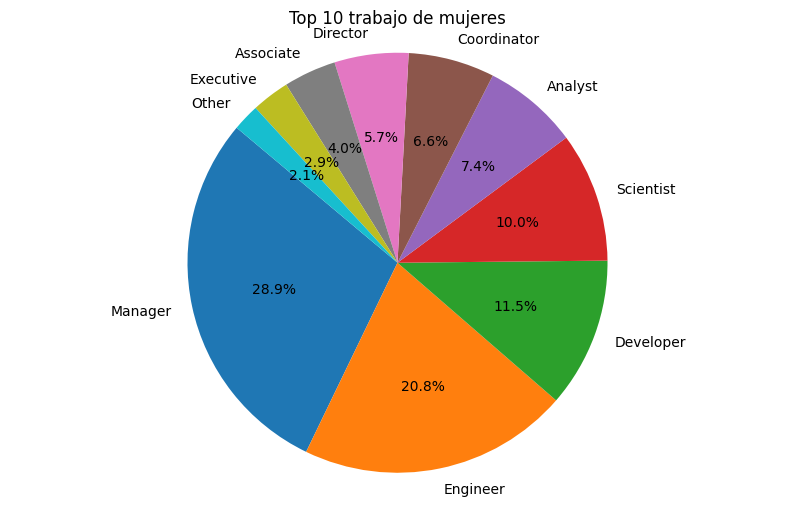

In [267]:
plt.figure(figsize=(10,6))
plt.title('Top 10 trabajo de mujeres')
plt.pie(df_top_trabajos_mujeres['Count'], labels = df_top_trabajos_mujeres['Job Classification'], autopct = '%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

Conclusion > El trabajo mas demandado esta en la clasificacion de Manager, en donde 823 mujeres tienen ese cargo, seguido de Engineer.

In [273]:
trabajos_hombres = df_hombres['Job Classification'].str.split(', ').explode()
contar_trabajos_hombres = Counter(trabajos_hombres)
top_trabajos_hombres = contar_trabajos_hombres.most_common(10)
df_top_trabajos_hombres = pd.DataFrame(top_trabajos_hombres, columns = ["Job Classification", "Count"])

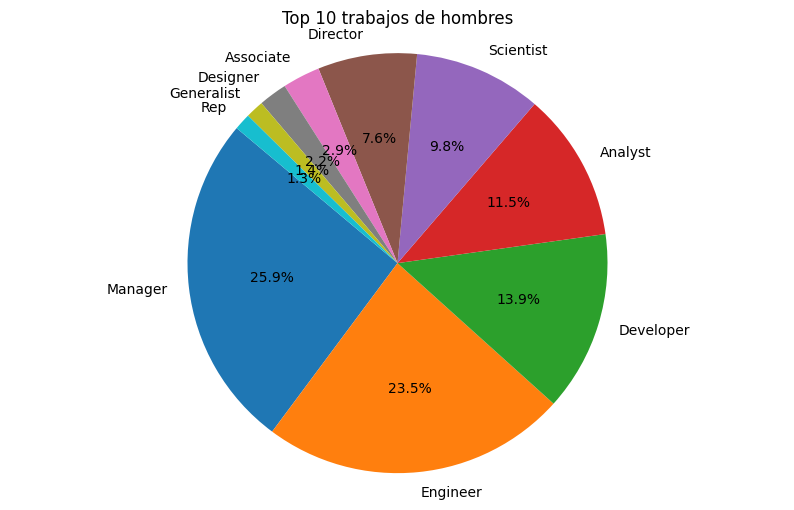

In [266]:
plt.figure(figsize=(10, 6))
plt.pie(df_top_trabajos_hombres['Count'], labels=df_top_trabajos_hombres['Job Classification'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 trabajos de hombres')
plt.axis('equal')  # Igualar los ejes para que el gráfico de pie sea un círculo.
plt.show()

Conclusion > El trabajo mas demandado esta en la clasificacion de Manager, en donde 934 hombres tienen ese cargo, seguido de Engineer.

In [191]:
df_mujeres.describe()

,Age,Years of Experience,Salary
count,3013.000000,3013.000000,3013.000000
mean,32.626286,7.418852,107888.998672
std,6.976178,5.845436,52723.610035
min,21.000000,0.000000,500.000000
25%,28.000000,3.000000,60000.000000
50%,31.000000,6.000000,105000.000000
75%,36.000000,11.000000,150000.000000
max,60.000000,34.000000,220000.000000


In [192]:
df_hombres.describe()

,Age,Years of Experience,Salary
count,3671.000000,3671.000000,3671.000000
mean,34.418415,8.616726,121395.697630
std,7.979936,6.126321,52098.626225
min,22.000000,0.000000,350.000000
25%,28.000000,3.000000,75000.000000
50%,32.000000,8.000000,120000.000000
75%,40.000000,13.000000,170000.000000
max,62.000000,32.000000,250000.000000


Conclusion > Con esto se puede notar que los hombres tienen una diferencia salarial con respecto a las mujeres.

Nota: Estos son datos generales de todas los trabajos. La cantidad de hombres y mujeres no están igualadas. Hay mas hombres que mujeres.

In [269]:
promedio_salario_trabajo_mujeres = df_mujeres.groupby('Job Classification')['Salary'].mean().sort_values(ascending=False)
df_promedio_salario_trabajo_mujeres = promedio_salario_trabajo_mujeres.reset_index()
df_promedio_salario_trabajo_mujeres.columns = ["Job Classification", "Salario"]

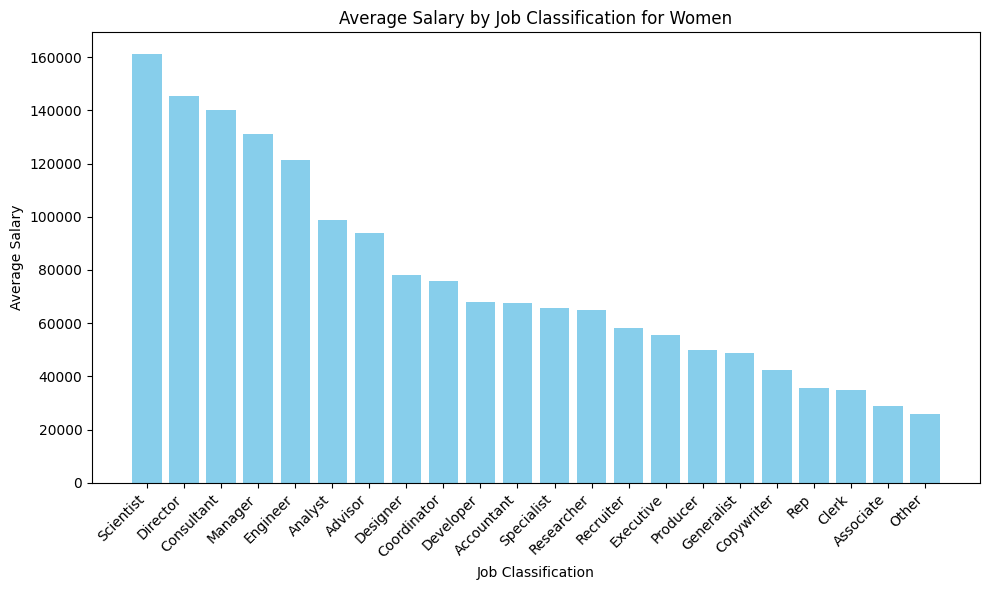

In [216]:
plt.figure(figsize=(10, 6))
plt.bar(df_promedio_salario_trabajo_mujeres['Job Classification'], df_promedio_salario_trabajo_mujeres['Salario'], color='skyblue')
plt.xlabel('Job Classification')
plt.ylabel('Average Salary')
plt.title('Average Salary by Job Classification for Women')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [220]:
promedio_salario_trabajo_hombres = df_hombres.groupby('Job Classification')['Salary'].mean().sort_values(ascending=False)
df_promedio_salario_trabajo_hombres = promedio_salario_trabajo_hombres.reset_index()

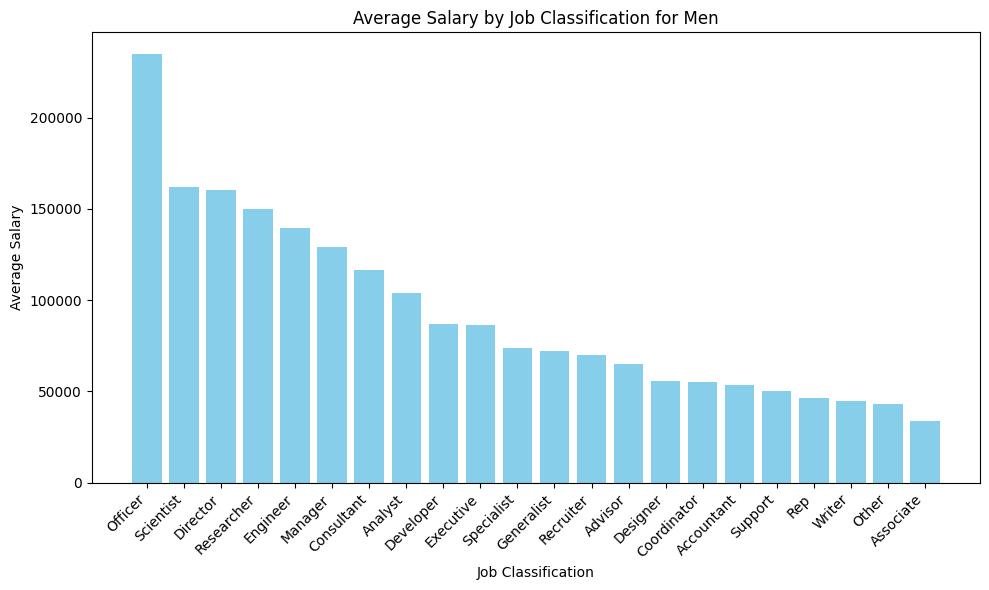

In [222]:
plt.figure(figsize=(10, 6))
plt.bar(df_promedio_salario_trabajo_hombres['Job Classification'], df_promedio_salario_trabajo_hombres['Salary'], color='skyblue')
plt.xlabel('Job Classification')
plt.ylabel('Average Salary')
plt.title('Average Salary by Job Classification for Men')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Conclusion > En promedio, un Officer tiene la mayor paga y en las mujeres una Scientist

In [219]:
salario_promedio_por_titulo_hombres = df_hombres.groupby('Education Level')['Salary'].mean().sort_values(ascending=False)
df_salario_promedio_por_titulo_hombres = salario_promedio_por_titulo_hombres.reset_index()

,Education Level,Salary
0,phd,168711.071019
1,master's,140060.592405
2,bachelor's,98971.768513
3,high school,39380.751351


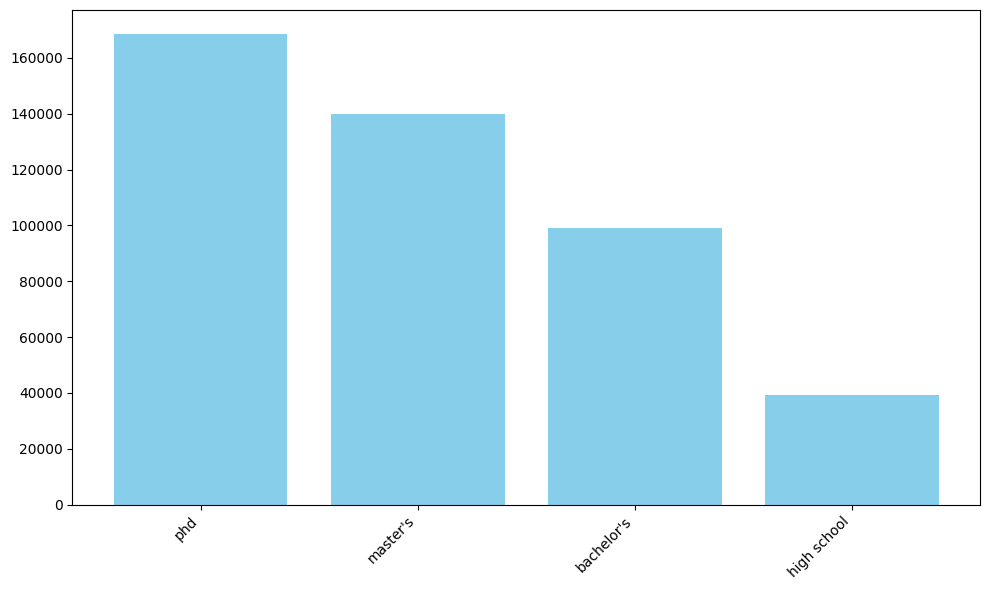

In [234]:
plt.figure(figsize=(10,6))
plt.bar(df_salario_promedio_por_titulo_hombres['Education Level'], df_salario_promedio_por_titulo_hombres['Salary'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [235]:
salario_promedio_por_titulo_mujeres = df_mujeres.groupby('Education Level')['Salary'].mean().sort_values(ascending=False)
df_salario_promedio_por_titulo_mujeres = salario_promedio_por_titulo_mujeres.reset_index()

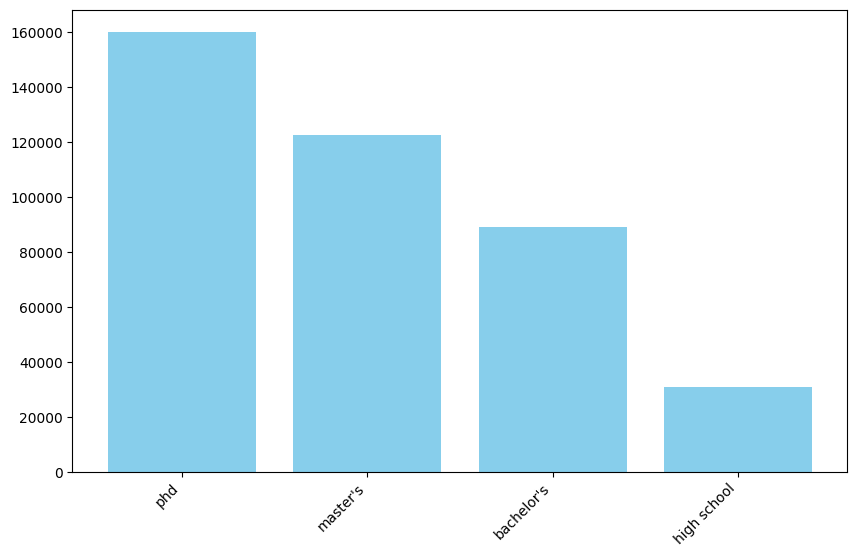

In [237]:
plt.figure(figsize=(10,6))
plt.bar(df_salario_promedio_por_titulo_mujeres['Education Level'], df_salario_promedio_por_titulo_mujeres['Salary'], color = 'skyblue')
plt.xticks(rotation=45, ha="right")
plt.show()

Conclusion > El salario promedio teniendo un Doctorado (phd) para los hombres es de 168.711$ y para mujeres de 160.266$

### Trabajos con experiencia menores a 5 anos

In [197]:
df_hombres_experiencia_menor_5 = df_hombres[df_hombres['Years of Experience'] <= 5]
df_mujeres_experiencia_menor_5 = df_mujeres[df_mujeres['Years of Experience'] <= 5]

In [238]:
salario_promedio_hombres_menor_5_anos = df_hombres_experiencia_menor_5.groupby('Job Classification')['Salary'].mean().sort_values(ascending=False)
df_salario_promedio_hombres_menor_5_anos = salario_promedio_hombres_menor_5_anos.reset_index()

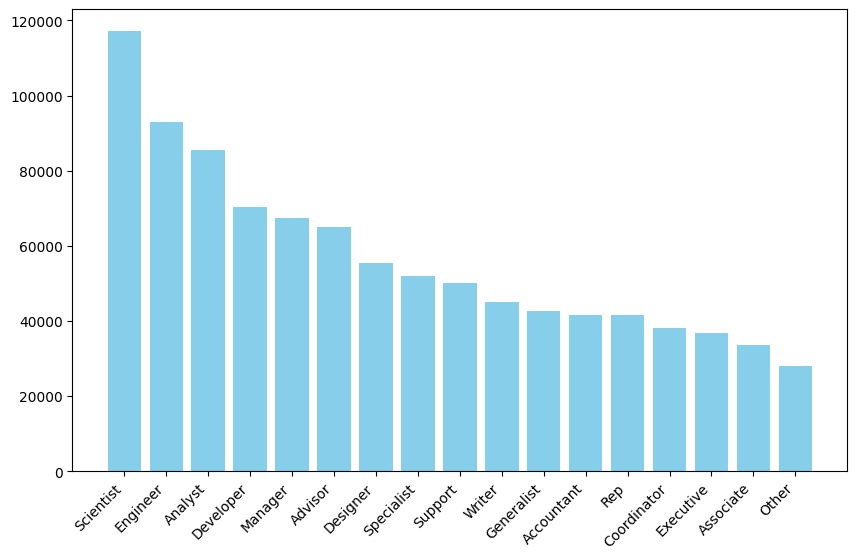

In [239]:
plt.figure(figsize = (10,6))
plt.bar(df_salario_promedio_hombres_menor_5_anos['Job Classification'], df_salario_promedio_hombres_menor_5_anos['Salary'], color = 'skyblue')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [240]:
salario_promedio_mujeres_menor_5_anos = df_mujeres_experiencia_menor_5.groupby('Job Classification')['Salary'].mean().sort_values(ascending=False)
df_salario_promedio_mujeres_menor_5_anos = salario_promedio_mujeres_menor_5_anos.reset_index()

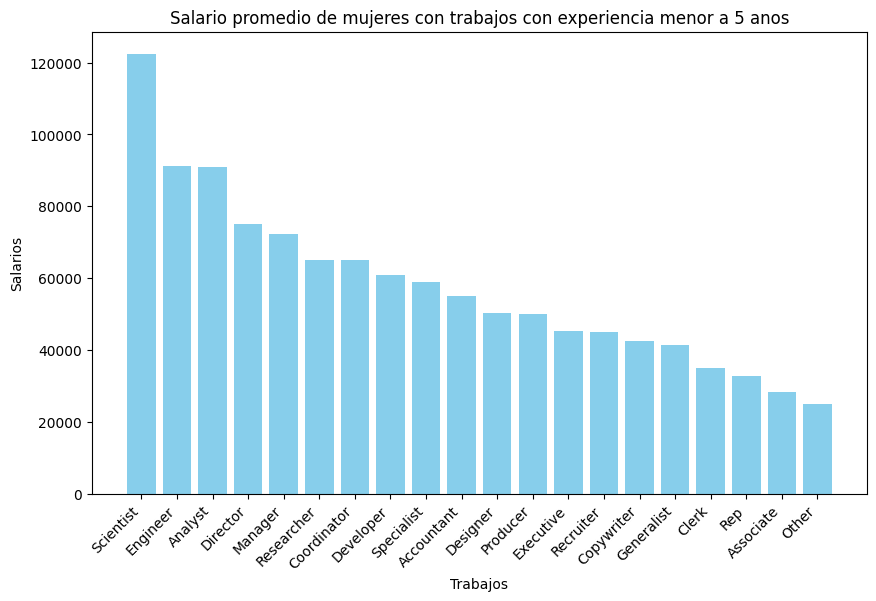

In [244]:
plt.figure(figsize=(10,6))
plt.title('Salario promedio de mujeres con trabajos con experiencia menor a 5 anos')
plt.xlabel('Trabajos')
plt.ylabel('Salarios')
plt.bar(df_salario_promedio_mujeres_menor_5_anos['Job Classification'], df_salario_promedio_mujeres_menor_5_anos['Salary'], color = 'skyblue')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

Conclusion > Trabajo mejor pagado con menos de 5 anos para mujeres y hombres: es de Scientist 